## Import

In [21]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
import glob
import os
import time
import random
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

from tqdm.notebook import tqdm
from pycaret.regression import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Data Load

In [87]:
train_df = pd.read_csv('./train.csv') # Train

val_df = pd.read_csv('./val.csv') # Validation

test_df = pd.read_csv('./test.csv') # Test

train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


shape 확인

In [88]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(113842, 31)
(28462, 32)
(142503, 31)


In [89]:
test_df.head(2)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983


데이터 합치기

In [90]:
data = pd.concat([train_df,val_df.drop("Class",axis=1),test_df],ignore_index = True)

In [91]:
data.head(3)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960


## Train/Validation Feature 분포 확인

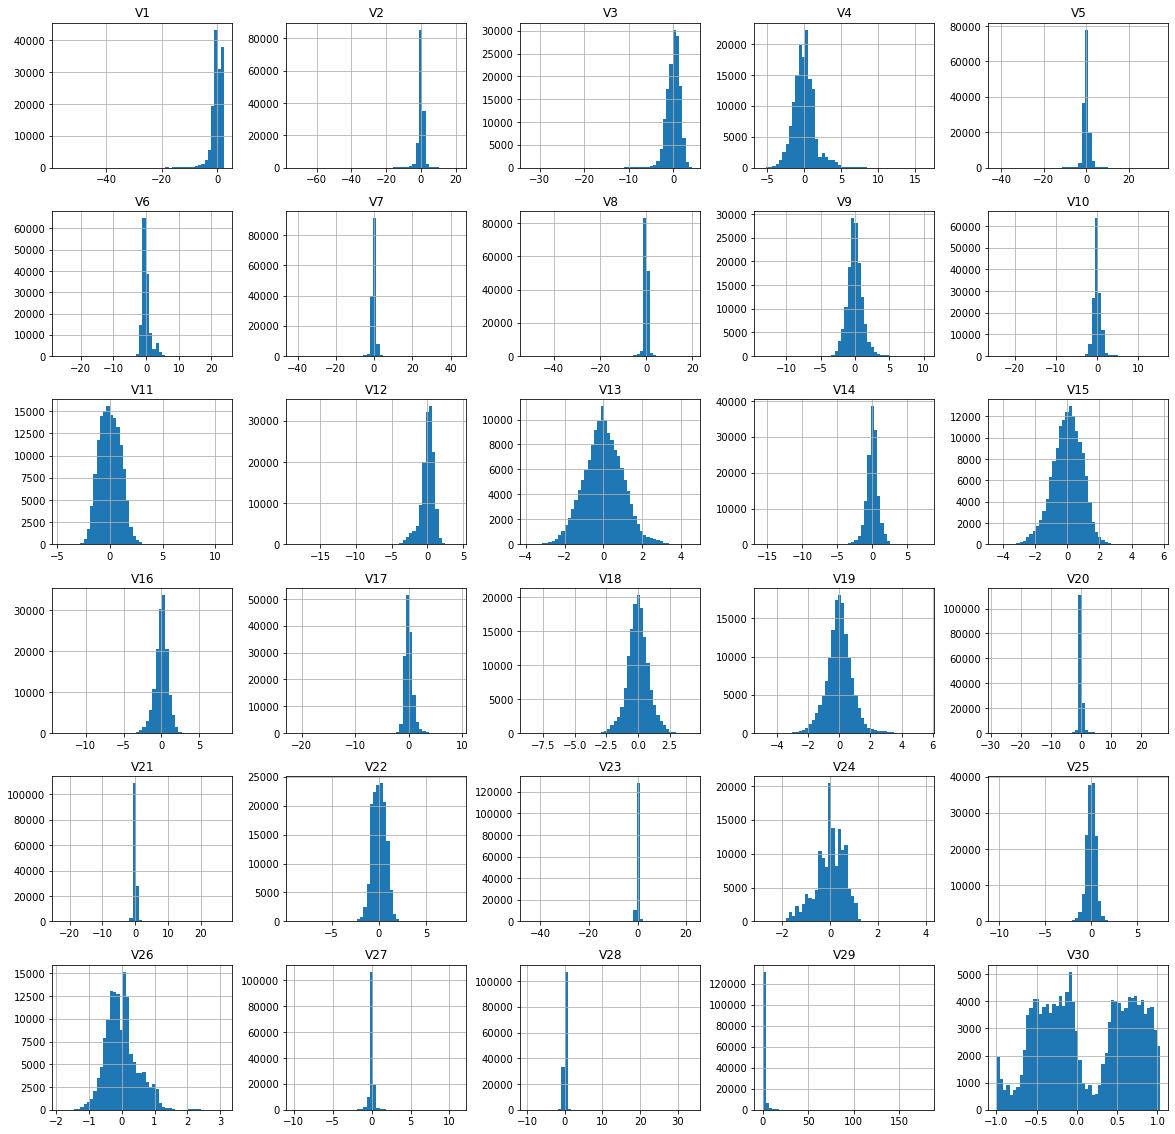

In [13]:
data.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

#### 왜도 확인
- 데이터가 치우친 정도가 심하다

In [14]:
data.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30'],
      dtype='object')

In [19]:
loglist=[]
# 왜도 3인 설명변수 log1p 변환
for val in data.columns[1:]:
    if abs(data[val].skew())>3:
        loglist.append(val)
        print(val," 왜도 skew 값: ",data[val].skew())
        print("log 변환 처리 이후 skew 값 ",abs(np.log1p(data[val])).skew())
        print("----------------------------------------")
loglist

V1  왜도 skew 값:  -3.293842010776379
log 변환 처리 이후 skew 값  2.9739750468628343
----------------------------------------
V2  왜도 skew 값:  -4.804849654389017
log 변환 처리 이후 skew 값  3.0639524109389042
----------------------------------------
V8  왜도 skew 값:  -7.818083169465193
log 변환 처리 이후 skew 값  4.032907163269734
----------------------------------------
V21  왜도 skew 값:  3.9481556782762293
log 변환 처리 이후 skew 값  4.989809265583895
----------------------------------------
V23  왜도 skew 값:  -6.474893240652889
log 변환 처리 이후 skew 값  5.220947216353255
----------------------------------------
V28  왜도 skew 값:  17.319666847043383
log 변환 처리 이후 skew 값  8.06114375415991
----------------------------------------
V29  왜도 skew 값:  11.941480483314313
log 변환 처리 이후 skew 값  2.3784560489198068
----------------------------------------


['V1', 'V2', 'V8', 'V21', 'V23', 'V28', 'V29']

로그변환 한번 더 시도
- 개선되지 않음 그대로 데이터 사용하기

In [26]:
for val in ['V8', 'V21', 'V23', 'V28']:
    print(val,"로그변환 재시도 ",abs(np.log1p(np.log1p(data[val]))).skew())

V8 로그변환 재시도  4.790972974035915
V21 로그변환 재시도  5.0509795700517195
V23 로그변환 재시도  5.820662666267282
V28 로그변환 재시도  9.466255494201304


로그변환 이전

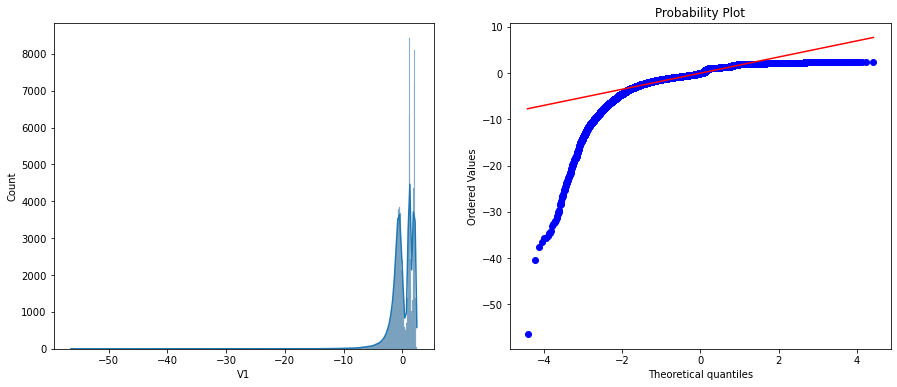

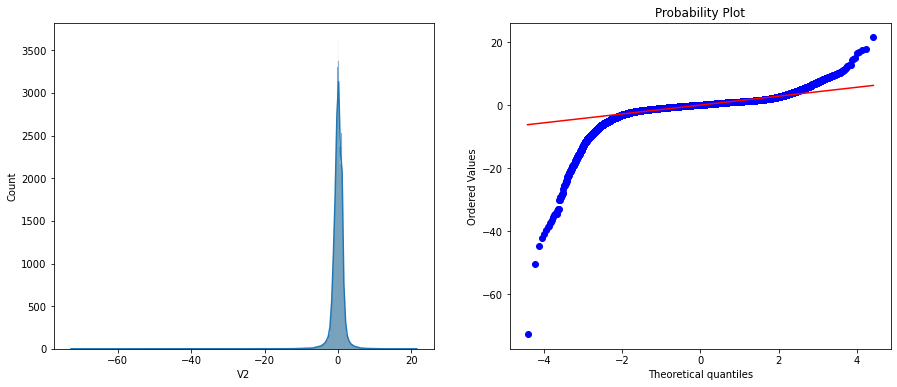

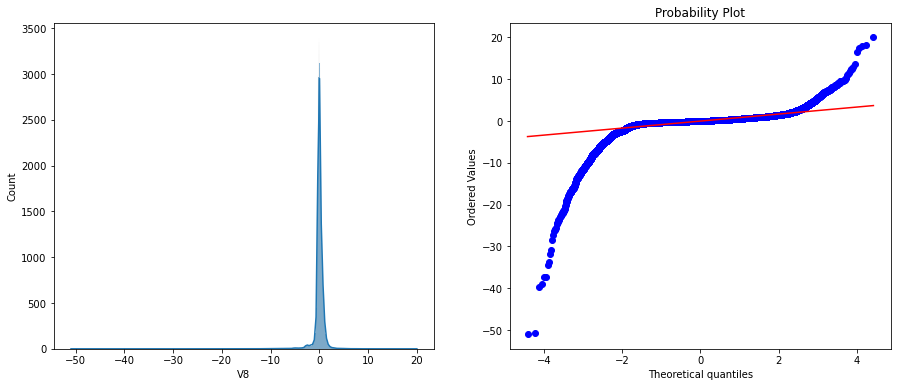

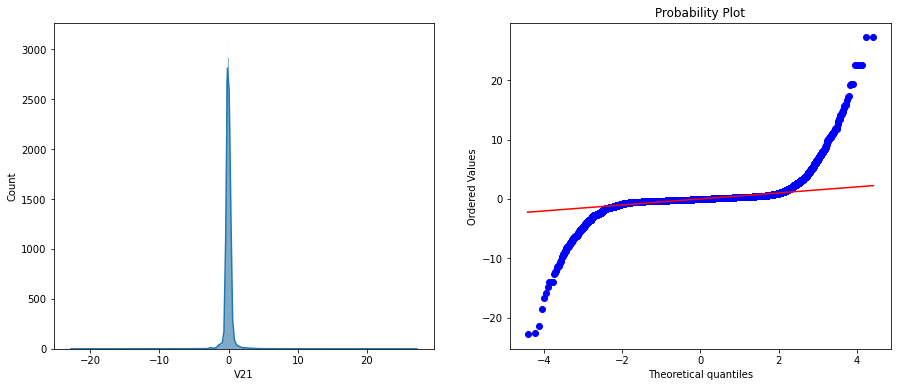

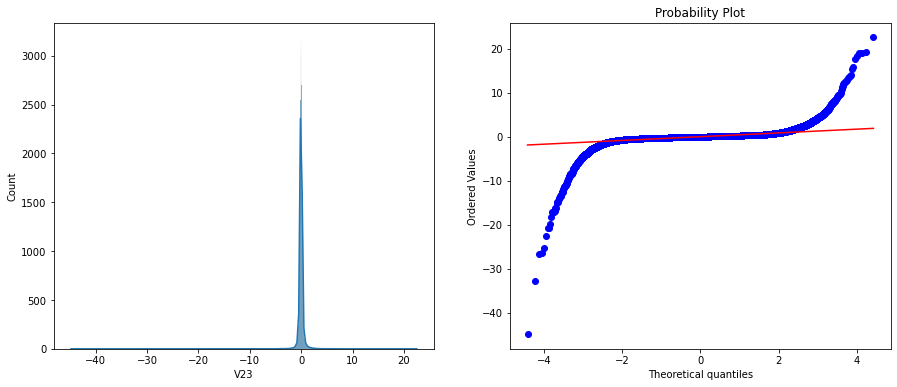

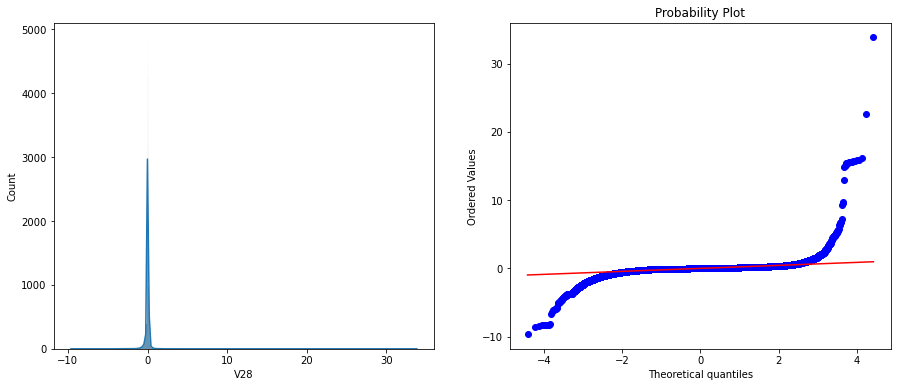

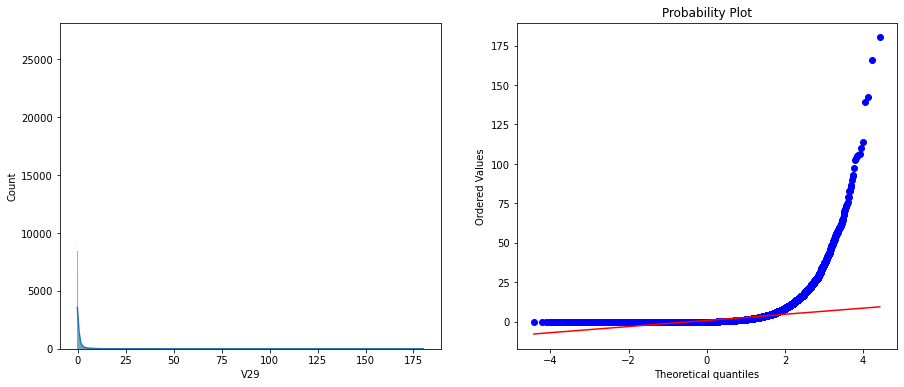

In [24]:
from scipy import stats
# log1p 변환시도
for col in ['V1', 'V2', 'V8', 'V21', 'V23', 'V28', 'V29']:
    fig, axs = plt.subplots(1,2, figsize = (15,6))
    
    sns.histplot(data[col], kde=True, ax =axs[0])
    stats.probplot(data[col], dist='norm', fit=True, plot=axs[1])

plt.show()

로그변환 이후

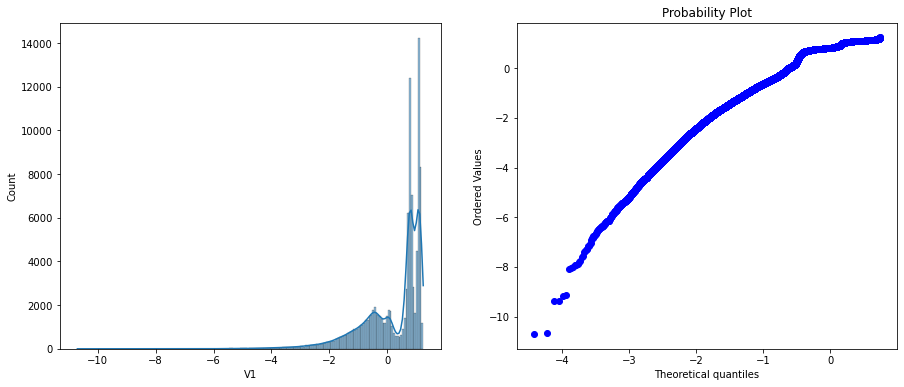

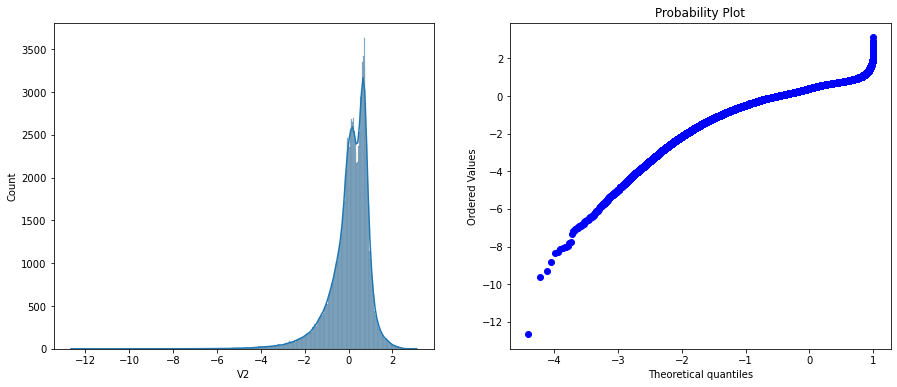

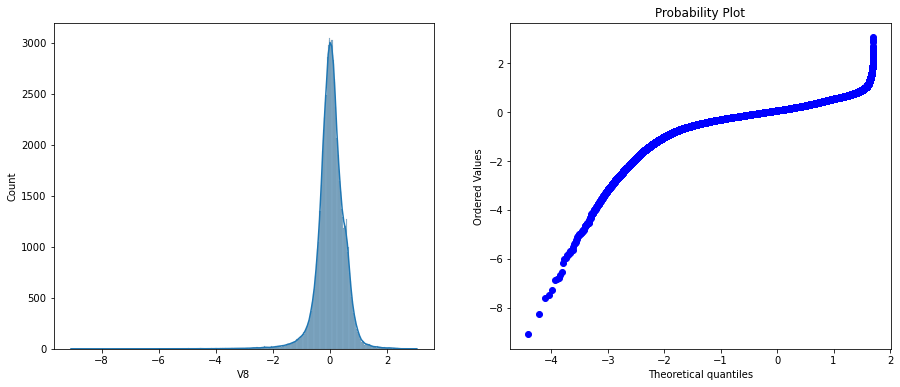

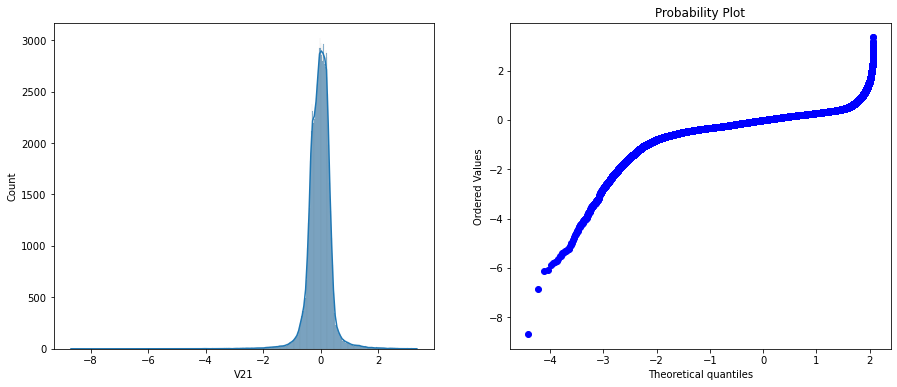

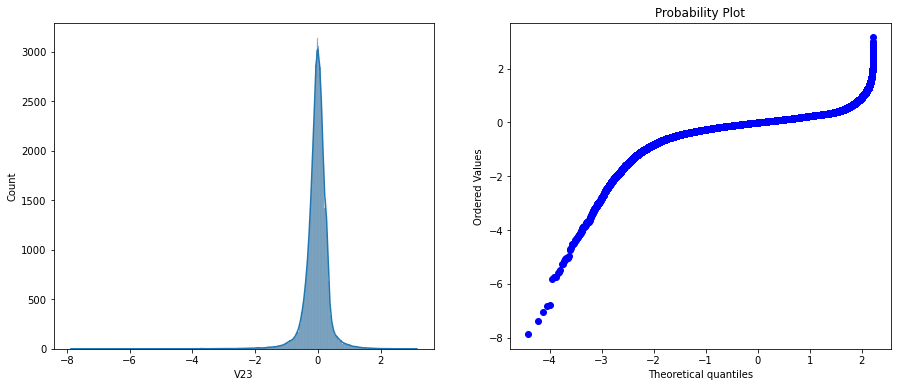

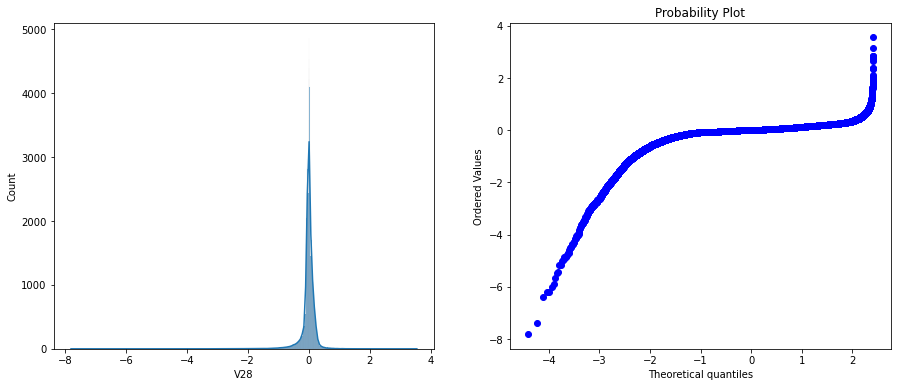

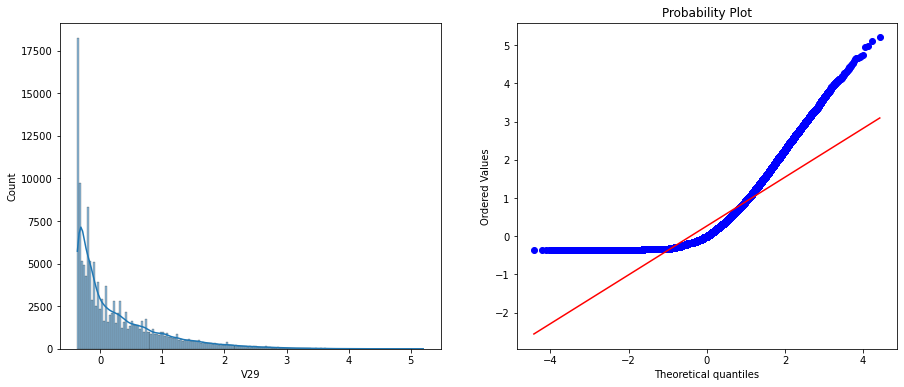

In [23]:
from scipy import stats
# log1p 변환시도
for col in ['V1', 'V2', 'V8', 'V21', 'V23', 'V28', 'V29']:
    fig, axs = plt.subplots(1,2, figsize = (15,6))
    
    sns.histplot(np.log1p(data[col]), kde=True, ax =axs[0])
    stats.probplot(np.log1p(data[col]), dist='norm', fit=True, plot=axs[1])

plt.show()

### 이상치 확인
- zscore 3값 기준

In [92]:
def replace_outlier_zscore(df,columns,n):
    data = df.copy()
    mean = np.mean(data[columns])
    std = np.std(data[columns])
    score_top = int(n)*std + mean
    score_bot = -1*n*std + mean
    
    def cond1(x):
        if x > score_top:
            return score_top
        if x < score_bot:
            return score_bot
        else:
            return x
    data[columns] = data[columns].apply(cond1)
    
    return data[columns]

In [93]:
for col in data.columns[1:]:
    
    data[col+"_scale"] = replace_outlier_zscore(data,col,3)
    
    if (data[col] == data[col+"_scale"]).sum() == 148168:
        pass
    else:
        print(col)
        print("이상치 비율 : ", (len(data) - (data[col] == data[col+"_scale"]).sum()) / len(data) * 100,"%")
        print("-----------------------------------------------")
        
    #data.drop([col+"_scale"],axis=1,inplace=True)

V1
이상치 비율 :  1.2994764875863305 %
-----------------------------------------------
V2
이상치 비율 :  1.5161144213449809 %
-----------------------------------------------
V3
이상치 비율 :  0.6976654365939039 %
-----------------------------------------------
V4
이상치 비율 :  1.0863497034834115 %
-----------------------------------------------
V5
이상치 비율 :  1.0340335736130082 %
-----------------------------------------------
V6
이상치 비율 :  1.6333868198464223 %
-----------------------------------------------
V7
이상치 비율 :  1.194141997914377 %
-----------------------------------------------
V8
이상치 비율 :  1.4820562696843829 %
-----------------------------------------------
V9
이상치 비율 :  0.8051066160592963 %
-----------------------------------------------
V10
이상치 비율 :  1.2246889999192436 %
-----------------------------------------------
V11
이상치 비율 :  0.2401626364520535 %
-----------------------------------------------
V12
이상치 비율 :  1.1913330781897917 %
-----------------------------------------------
V13
이상치 비율 :  

이상치 대체하기

In [94]:
data_scaled = data.copy().iloc[:,31:]

In [95]:
data_scaled.head(3)

,V1_scale,V2_scale,V3_scale,V4_scale,V5_scale,V6_scale,V7_scale,V8_scale,V9_scale,V10_scale,V11_scale,V12_scale,V13_scale,V14_scale,V15_scale,V16_scale,V17_scale,V18_scale,V19_scale,V20_scale,V21_scale,V22_scale,V23_scale,V24_scale,V25_scale,V26_scale,V27_scale,V28_scale,V29_scale,V30_scale
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.628754,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960


스케일링 하기

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [97]:
for col in data_scaled.columns[1:]:
    
    scaler = StandardScaler()
    
    scale_data = scaler.fit_transform(data_scaled[col].values.reshape(-1,1))
    data_scaled[col] = scale_data

In [98]:
data_scaled.head(3)

,V1_scale,V2_scale,V3_scale,V4_scale,V5_scale,V6_scale,V7_scale,V8_scale,V9_scale,V10_scale,V11_scale,V12_scale,V13_scale,V14_scale,V15_scale,V16_scale,V17_scale,V18_scale,V19_scale,V20_scale,V21_scale,V22_scale,V23_scale,V24_scale,V25_scale,V26_scale,V27_scale,V28_scale,V29_scale,V30_scale
0,-1.358354,-1.052033,1.259696,0.280758,-0.433826,1.447848,0.823496,0.276121,-1.431189,0.250156,0.625529,0.059273,0.723471,-0.207814,2.577386,-3.158952,1.553971,-0.150886,-2.845045,1.017984,0.571278,1.087676,2.384717,-1.146925,-0.656807,-0.289124,-0.216660,-0.301321,2.042355,-1.996562
1,-0.966272,-0.165980,1.273912,-0.619243,-0.012802,1.004623,0.243160,0.445931,-1.309961,-0.041818,-0.222496,0.180099,0.512209,-0.350147,-0.694913,-1.277503,-0.969207,2.390142,-1.549112,-0.398525,-0.219729,0.004906,-0.503677,-1.956225,1.284609,-0.463531,0.203845,0.298080,0.309074,-1.996562
2,-0.425966,0.713025,0.805507,-0.116025,0.355609,-0.018279,0.493161,0.292661,-0.532657,-0.393677,1.339792,0.375827,-0.360769,-0.174194,0.567978,0.474768,-0.088854,0.080449,-0.038885,0.167689,-0.441631,-0.793459,-0.073142,-0.617946,-0.467950,0.226760,0.884488,0.395118,-0.504922,-1.996541


### 데이터 분리하기
- 학습 / 검증 / 평가

In [128]:
train_df_scaled = data_scaled.iloc[:113842,:].reset_index(drop=True)

val_df_scaled = data_scaled.iloc[113842:142304,:].reset_index(drop=True)

test_df_scaled = data_scaled.iloc[142304:,:].reset_index(drop=True)

In [129]:
val_df_scaled["Class"] = val_df["Class"].values

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [130]:
val_normal, val_fraud = val_df_scaled['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


중복 확인 및 체크
- 중복인 데이터가 존재하지 않음
- ID 열 drop해도 상관없음

In [131]:
train_df[train_df.duplicated(['ID'])]

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30


## Model Define & Fit

In [132]:
# Train dataset은 Label이 존재하지 않음
try:
    train_x = train_df_scaled.drop(columns=['ID'],axis=1) # Input Data
except:
    pass

In [133]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model = IsolationForest(n_estimators=125, max_samples=len(train_x), # contamination : 비율
                        contamination=val_contamination, random_state=0, verbose=0)
model.fit(train_x)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=125, random_state=0)

## Evaluation : Validation set

In [134]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [135]:
val_x = val_df_scaled.drop(columns=['Class']) # Input Data
val_y = val_df_scaled['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4997187653800183]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



## Inference : Test set

In [136]:
test_df_scaled.head()

,V1_scale,V2_scale,V3_scale,V4_scale,V5_scale,V6_scale,V7_scale,V8_scale,V9_scale,V10_scale,V11_scale,V12_scale,V13_scale,V14_scale,V15_scale,V16_scale,V17_scale,V18_scale,V19_scale,V20_scale,V21_scale,V22_scale,V23_scale,V24_scale,V25_scale,V26_scale,V27_scale,V28_scale,V29_scale,V30_scale
0,-1.359807,-0.079713,1.808042,1.003597,-0.292988,0.375936,0.245245,0.081162,0.353029,0.120234,-0.546476,-0.677551,-0.999283,-0.377272,1.612728,-0.570962,0.285396,0.028265,0.511587,0.489332,-0.019937,0.389982,-0.293964,0.111571,0.251522,-0.394440,0.456112,-0.109949,0.486505,-1.996583
1,1.191857,0.180311,0.105196,0.330262,0.047271,-0.060442,-0.088382,0.063370,-0.235123,-0.166373,1.610311,1.135770,0.493394,-0.181941,0.697606,0.549338,-0.168558,-0.226372,-0.180648,-0.130004,-0.480530,-0.904854,0.262218,-0.565390,0.328443,0.268828,-0.051523,0.066975,-0.511579,-1.996583
2,-1.158233,0.649512,1.098390,0.297595,-0.351819,0.082374,0.615483,-0.402029,0.784211,0.856609,-0.816774,0.567931,1.357206,-1.320692,0.191545,-0.548238,-0.340460,-0.049636,1.014599,0.792976,-0.000231,1.125255,-0.364837,0.235287,-0.414618,1.061352,0.761900,1.058131,-0.054415,-1.996541
3,1.229658,0.084299,0.018174,0.876502,0.159908,0.223991,-0.011217,0.058281,0.449127,-0.091077,-1.408769,-0.177659,-0.756977,0.181126,0.054184,-0.538811,-0.003129,-0.748212,-0.054474,-0.420931,-0.351636,-0.385000,-0.408556,-1.297994,1.489222,-0.537874,0.103361,0.019717,-0.495955,-1.996499
4,0.384978,0.448795,-0.642647,-0.062279,2.494170,2.662682,0.487140,0.656376,-0.523371,0.363692,-0.255010,-0.363316,-0.090518,0.409204,1.020019,-0.162187,-1.146254,0.435138,0.893946,0.246965,0.131540,0.334295,0.020169,1.658931,-1.532266,-1.032618,0.131727,-0.274546,-0.461990,-1.996372


In [137]:
test_x = test_df_scaled.copy()

In [138]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

## Submission

In [139]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [140]:
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)